In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [4]:
data = pd.read_csv('heart_data/processed.cleveland.data')
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')
data = data.dropna()

predictors = data.drop("target",axis=1)
target = data["target"].replace([2,3,4], 1)
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

search_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2']
}

In [6]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(dt, search_space, cv=5, verbose=0)

In [7]:
best_model = clf.fit(X_train, Y_train)
print('completed')

completed


In [8]:
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best Max Depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best Min Samples Split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best Min Samples Leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best Max Features:', best_model.best_estimator_.get_params()['max_features'])

Best Criterion: gini
Best Max Depth: 4
Best Min Samples Split: 2
Best Min Samples Leaf: 7
Best Max Features: sqrt


In [9]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[np.linspace(0.01, 1.0, 50)], verbose=1, random_state=42)

[learning_curve] Training set sizes: [  1   5   9  13  17  20  24  28  32  36  40  43  47  51  55  59  62  66
  70  74  78  82  85  89  93  97 101 104 108 112 116 120 124 127 131 135
 139 143 146 150 154 158 162 166 169 173 177 181 185 189]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.2s finished


In [11]:
print(test_scores.max())

0.9148936170212766


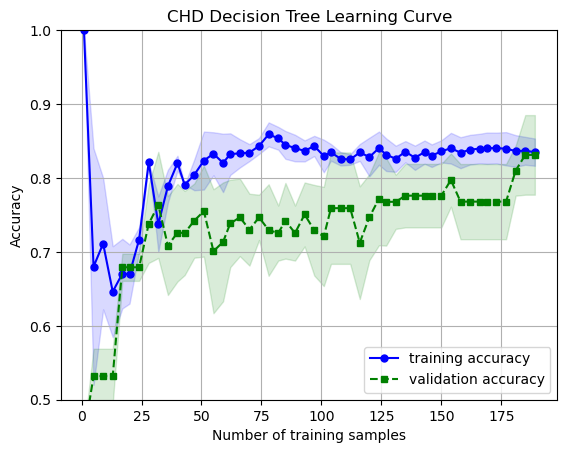

In [54]:
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('CHD Decision Tree Learning Curve')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

In [60]:
from sklearn.model_selection import validation_curve

param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
val_train_scores, val_test_scores = validation_curve(best_model.best_estimator_, X_train, Y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(val_train_scores, axis=1)
train_std = np.std(val_train_scores, axis=1)
test_mean = np.mean(val_test_scores, axis=1)
test_std = np.std(val_test_scores, axis=1)

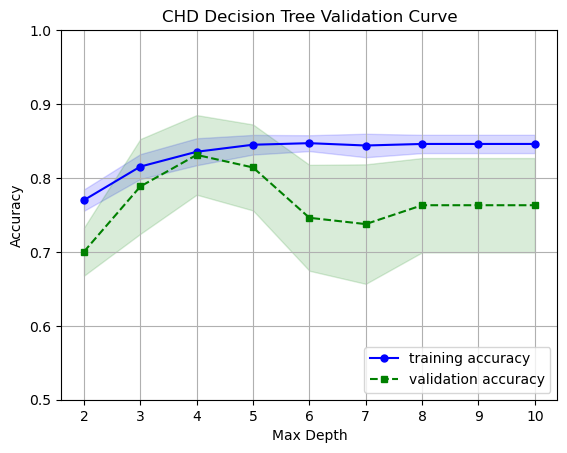

In [62]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('linear')
plt.legend(loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('CHD Decision Tree Validation Curve')
plt.ylim([0.5, 1.0])
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix

y_pred = best_model.best_estimator_.predict(X_test)
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print(confmat)

[[26  4]
 [10 20]]


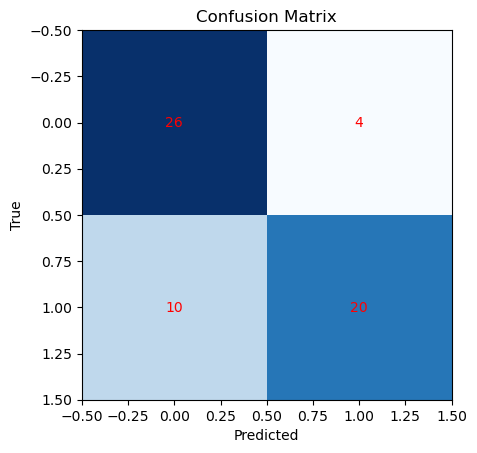

In [48]:
import matplotlib.pyplot as plt

# Plot the confusion matrix as an image
plt.imshow(confmat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Add the values as annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, confmat[i, j], ha='center', va='center', color='red')

# Show the plot
plt.show()

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred))

Precision: 0.833
Recall: 0.667
F1: 0.741


In [50]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=y_pred, pos_label=1)
roc_auc = auc(x=fpr, y=tpr)
print('ROC AUC: %.3f' % roc_auc)

ROC AUC: 0.767


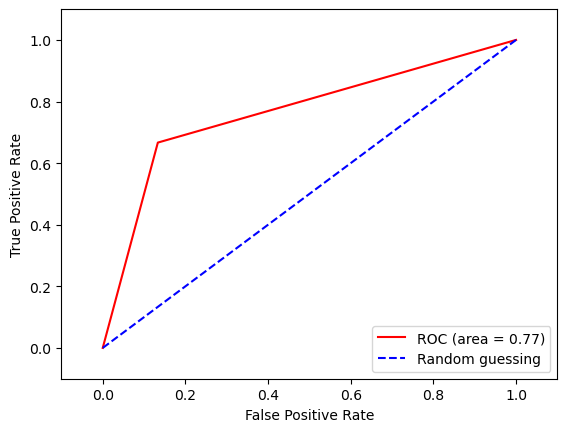

In [51]:
plt.plot(fpr, tpr, color='red', label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random guessing')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [52]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score

scorer = make_scorer(accuracy_score)
scores = cross_val_score(estimator=best_model.best_estimator_, X=X_train, y=Y_train, cv=10, n_jobs=-1, scoring=scorer)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.83333333 0.83333333 0.83333333 0.79166667 0.75       0.875
 0.79166667 0.73913043 0.91304348 0.82608696]
CV accuracy: 0.819 +/- 0.050


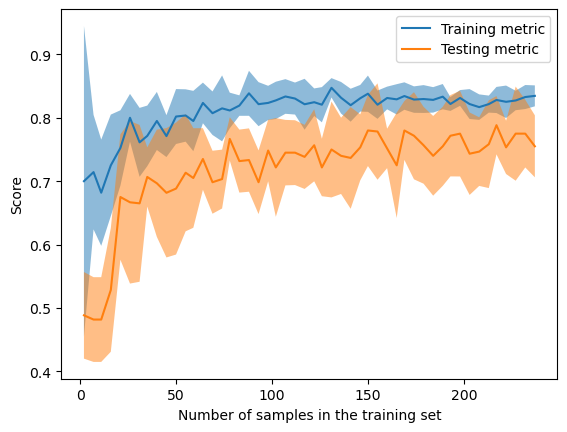

In [53]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
common_params = dict(X=predictors, y=target, cv=cv, scoring='accuracy', n_jobs=-1, score_type='both', train_sizes=np.linspace(0.01, 1.0, 50), verbose=0)
fit_params = {
    'criterion': best_model.best_estimator_.get_params()['criterion'],
    'max_depth': best_model.best_estimator_.get_params()['max_depth'],
    'min_samples_split': best_model.best_estimator_.get_params()['min_samples_split'],
    'min_samples_leaf': best_model.best_estimator_.get_params()['min_samples_leaf'],
    'max_features': best_model.best_estimator_.get_params()['max_features']
}
X, y = predictors, target
dtc = DecisionTreeClassifier(**fit_params)
viz = LearningCurveDisplay.from_estimator(dtc, **common_params)